# 服饰图像分类

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import  plot_model

from keras import layers
from keras.datasets import imdb
from keras.preprocessing import sequence

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.callbacks import TensorBoard

from tensorflow.nn import softmax
from tensorflow.nn import relu

import numpy as np
import matplotlib.pyplot as plt
import gzip
import os
import matplotlib
 

Using TensorFlow backend.


##### 获得数据（解压缩）

In [2]:
def get_data():
    files_name = [
      'train-labels-idx1-ubyte.gz', 'train-images-idx3-ubyte.gz',
      't10k-labels-idx1-ubyte.gz', 't10k-images-idx3-ubyte.gz'
    ]
    # 训练集、测试集文件路径
    root_path = r'C:/Users/STWOOF/OneDrive/桌面/fashion_mnist_data'
    file_paths = []
    for i in range(len(files_name)):
         file_paths.append(r'C:/Users/STWOOF/OneDrive/桌面/fashion_mnist_data/'+ files_name[i])
    
    # 使用gzip.open()解压文件，rb’表示以二进制可读的方式打开文件
    with gzip.open(file_paths[0], 'rb') as label_path:
        y_train = np.frombuffer(label_path.read(), np.uint8, offset=8)
 
    with gzip.open(file_paths[1], 'rb') as image_path:
        x_train = np.frombuffer(
            image_path.read(), np.uint8, offset=16).reshape(len(y_train), 28, 28)
 
    with gzip.open(file_paths[2], 'rb') as label_path:
        y_test = np.frombuffer(label_path.read(), np.uint8, offset=8)
 
    with gzip.open(file_paths[3], 'rb') as image_path:
        x_test = np.frombuffer(
            image_path.read(), np.uint8, offset=16).reshape(len(y_test), 28, 28)
        
    return (x_train, y_train), (x_test, y_test)


# ANN数据处理（标准化）

In [3]:
# 分别得到训练数据集和测试数据集
# train_images与train_labels : 60000
# test_images与test_labels : 10000
(train_images, train_labels), (test_images, test_labels) = get_data()

# 存储数字标签对应的名称
# zhfont = matplotlib.font_manager.FontProperties(fname=r'C:/Users/STWOOF/OneDrive/桌面/fashion_mnist_data/SimHei-windows.ttf')
# class_names = ['短袖圆领T恤', '裤子', '套衫', '连衣裙', '外套', '凉鞋', '衬衫', '运动鞋','包', '短靴']

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker','Bag', 'Ankle boot']
# 数据标准化处理
train_images = train_images / 255.0
test_images = test_images / 255.0


##### 输出以查看数据情况

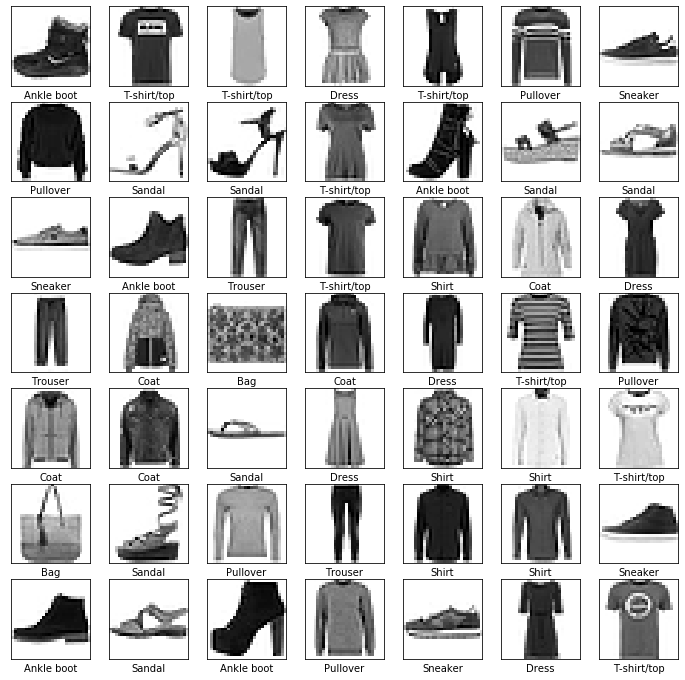

In [4]:
# 画布长宽为12
plt.figure(figsize=(12,12))
 
# 显示49 张图像
for i in range(49):
    # 每行7个
    plt.subplot(7, 7, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

### ANN神经网络构建

In [5]:
# 建立模型
def build_model():
    
    # 使用Keras的model.Sequential()方法
    model = Sequential()

    # 将图像（28 x 28）展开输出28 * 28 = 784个神经单元
    model.add(Flatten(input_shape=(28, 28)))

    # 全连接层，含256个神经元
    model.add(Dense(256, activation=relu))
    
    # 全连接层, 10神经元, 激活函数softmax
    model.add(Dense(10, activation=softmax))
    
    return model


### 编译ANN模型（1）

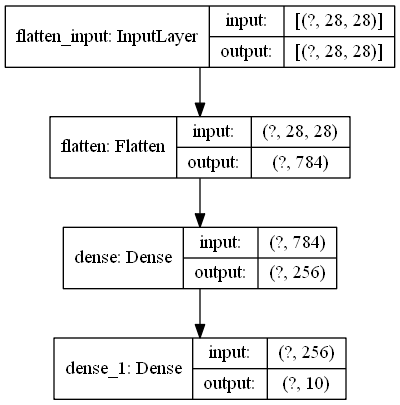

In [6]:
model = build_model()

# 回调函数，存储日志，用于TensorBoard可视化工具
callbacks = [
    TensorBoard(
        log_dir = r'C:/Users/STWOOF/OneDrive/桌面/fashion_mnist_data/my_log_ANN',
        histogram_freq =1,
        embeddings_freq=1,
        write_graph = True,
        update_freq = 200
    )
]

model.compile(optimizer=tf.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# Keras网络可视化
plot_model(model, show_shapes=True)

### 训练ANN模型

In [7]:
# 训练模型

history = model.fit(train_images, train_labels, epochs=5,callbacks=callbacks)

# 打印网络结果和参数数量
model.summary()

Epoch 1/5
1875/1875 [==============================] - 2s 894us/step - loss: 0.4836 - accuracy: 0.8282
Epoch 2/5
1875/1875 [==============================] - 2s 866us/step - loss: 0.3643 - accuracy: 0.8671
Epoch 3/5
1875/1875 [==============================] - 2s 908us/step - loss: 0.3259 - accuracy: 0.8808
Epoch 4/5
1875/1875 [==============================] - 2s 829us/step - loss: 0.3030 - accuracy: 0.8886
Epoch 5/5
1875/1875 [==============================] - 2s 852us/step - loss: 0.2836 - accuracy: 0.8947
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Tot

### ANN测试集结果评价

In [8]:
# 测试集预测结果
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('测试损失：%f 测试准确率: %f' % (test_loss, test_acc))

313/313 [==============================] - 0s 484us/step - loss: 0.3610 - accuracy: 0.8682
测试损失：0.360986 测试准确率: 0.868200


##### 在命令行启动TensorBoard服务器，指示它读取回调函数当前正在写入的日志。

In [9]:
# tensorboard --logdir "C:/Users/STWOOF/OneDrive/桌面/fashion_mnist_data/my_log"

# CNN数据处理

In [10]:
(train_images, train_labels), (test_images, test_labels) = get_data()
# 分别得到训练数据集和测试数据集
train_images = train_images.reshape([-1,28,28,1]) / 255.0
test_images = test_images.reshape([-1,28,28,1]) / 255.0

### 构建+编译CNN模型

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               803072    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

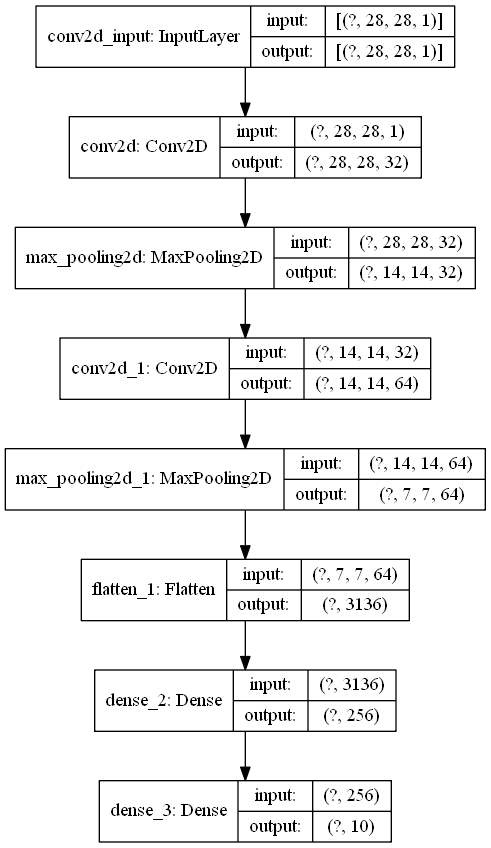

In [11]:
# 构建模型
model = Sequential()

# 卷积层->28*28*32
model.add(Conv2D(input_shape=(28, 28, 1),filters=32,kernel_size=5,strides=1,padding='same'))     # Padding method),
# 池化层->14*14*32
model.add(MaxPool2D(pool_size=2,strides=2,padding='same'))
# 卷积层->14*14*64
model.add(Conv2D(filters=64,kernel_size=3,strides=1,padding='same'))     # Padding method),
# 池化层->7*7*64
model.add(MaxPool2D(pool_size=2,strides=2,padding='same'))
# Flatten层->3136
model.add(Flatten())
# Dense层（ReLU）
model.add(Dense(256, activation=relu))
# Dense层（Softmax）
model.add(Dense(10, activation=softmax))

print(model.summary())

lr = 0.001
epochs = 5

# 编译模型
model.compile(optimizer = tf.optimizers.Adam(lr),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Keras网络可视化
plot_model(model, show_shapes=True)

### 训练CNN模型+预测结果

In [12]:
# 回调函数，存储日志，用于TensorBoard可视化工具
callbacks = [
    TensorBoard(
        log_dir = r'C:/Users/STWOOF/OneDrive/桌面/fashion_mnist_data/my_log_CNN',
        histogram_freq =1,
        embeddings_freq=1,
        write_graph = True,
        write_images = True,
    )
]

# 训练模型
model.fit(train_images, train_labels, epochs=5, callbacks=callbacks)

# 测试集预测结果
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('测试损失：%f 测试准确率: %f' % (test_loss, test_acc))

Epoch 1/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.3790 - accuracy: 0.8616
Epoch 2/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2500 - accuracy: 0.9085
Epoch 3/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2014 - accuracy: 0.9248
Epoch 4/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1599 - accuracy: 0.9399
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.3048 - accuracy: 0.9082
测试损失：0.304791 测试准确率: 0.908200


##### 在命令行启动TensorBoard服务器，指示它读取回调函数当前正在写入的日志。

In [13]:
# tensorboard --logdir "C:/Users/STWOOF/OneDrive/桌面/fashion_mnist_data/my_log_CNN"
# tensorboard --logdir "C:/Users/STWOOF/OneDrive/桌面/fashion_mnist_data/my_log"